### Neural network Regression
What is a regression problem?
* Prediction

What are we going to solve using this problem?
* Predict house prices!



In [2]:
import tensorflow as tf
print(tf.__version__)

2021-11-19 12:34:18.922087: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-19 12:34:18.922125: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.7.0


## Creating data to view and fit

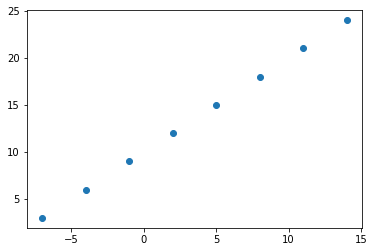

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant( [
    "bedroom",
    "bathroom",
    "garage"
] )
house_price = tf.constant( [939700] )
house_info, house_price

2021-11-19 12:34:22.596985: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-19 12:34:22.597415: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-19 12:34:22.597498: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-11-19 12:34:22.597563: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-11-19 12:34:22.597641: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

alled properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-11-19 12:34:22.598663: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [9]:
X[0].ndim # scalars have no shape

0

In [10]:
# convert X and y into tensors 
X = tf.constant(X,dtype=tf.float64)
y = tf.constant(y,dtype=tf.float64)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of the deep learning model.
2. **Compiling a model** - define the loss function (In other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. Fitting a model - letting the model try to find the patterns between X and & y (features and labels).


In [11]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model using the sequential API
# model = tf.keras.Sequential(
#     [
#         tf.keras.layers.Dense(1)
#     ]
# )

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. compile the model
model.compile(
    loss = tf.keras.losses.mae, # mean absolute error predicted vs observed
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent (lr=1e-3)
    metrics=['mae'] # mean absolute error
)

# 3. fit the model
# we have to expand axis because it breaks in the latest version
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 369ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [12]:
# attempt to predict
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [13]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model
We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function opr prehaps the **learning rate** of the optimization funciton

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it to train for longer) or on more data (give the model more examples to learn from)


Note: Learning Rate is the most important hyper parameter to improving or making our model worse

In [42]:
# modelv2 = tf.keras.Sequential()
# modelv2.add(tf.keras.layers.Dense(100, activation='relu'))
# modelv2.add(tf.keras.layers.Dense(100, activation='relu'))
# modelv2.add(tf.keras.layers.Dense(100, activation='relu'))
# modelv2.add(tf.keras.layers.Dense(1))

# # 2. compile the model
# modelv2.compile(
#     loss = tf.keras.losses.mae, # mean absolute error predicted vs observed
#     optimizer = tf.keras.optimizers.Adam(lr=0.0001), # stochastic gradient descent (lr=1e-3)
#     metrics=['mae'] # mean absolute error
# )

# # 3. fit the model
# # we have to expand axis because it breaks in the latest version
# modelv2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


# 1. create the model using the sequential API
modelV2 = tf.keras.Sequential()
modelV2.add(tf.keras.layers.Dense(100, activation='relu'))
modelV2.add(tf.keras.layers.Dense(1))

# 2. compile the model
modelV2.compile(
    loss = tf.keras.losses.mae, # mean absolute error predicted vs observed
    optimizer = tf.keras.optimizers.Adam(lr=0.015), # SGD stochastic gradient descent (lr=1e-3)
    metrics=['mae'] # mean absolute error
)

# 3. fit the model
# we have to expand axis because it breaks in the latest version
modelV2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 361ms/step - loss: 12.7137 - mae: 12.7137
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2742 - mae: 11.2742
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 9.9874 - mae: 9.9874
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 8.8762 - mae: 8.8762
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 7.7265 - mae: 7.7265
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 6.5397 - mae: 6.5397
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 5.3089 - mae: 5.3089
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 4.0392 - mae: 4.0392
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 3.8277 - mae: 3.8277
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 4.0410 - mae: 4.0410
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 4

## Trained Model predicted Y Results Vs Actual Y values
In this example below we plot the trained AI guess of Y from X value vs the actual result
- **Blue** is the test data we trained the model with
- **Red** is TF model guess

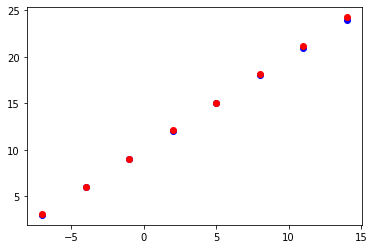

In [43]:
#modelV2.predict([17.0])
X = np.array(X,dtype=np.float64)
for i in range(0,len(X)):
    x_value = X[i]
    #print(x_value)
    # predict y value
    y_pred = modelV2.predict([x_value])

    # plot the prediction
    plt.scatter(x_value, y[i], color="blue")
    plt.scatter(x_value, y_pred, color="red")

## Data outside the Dataset
Let's see what happens if we try data outside the data set
The plots in orange are the neural networks guess thats outside the dataset
while red is still within the dataset and blue is our dataset

[-7. -4. -1.  2.  5.  8. 11. 14. 17. 20. 23. 26. 29. 32. 17. 20. 23. 26.
 29. 32. 17. 20. 23. 26. 29. 32. 17. 20. 23. 26. 29. 32. 17. 20. 23. 26.
 29. 32. 35. 38. 41. 44. 47. 50. 53. 56. 59. 62. 65. 68. 71. 74. 77. 80.
 83. 17. 20. 23. 26. 29. 32. 35. 38. 41. 44. 47. 50. 53. 56. 59. 62. 65.
 68. 71. 74. 77. 80. 83. 17. 20. 23. 26. 29. 32. 35. 38. 41. 44. 47. 50.
 53. 56. 59. 62. 65. 68. 71. 74. 77. 80. 83.]


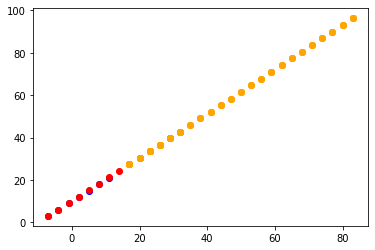

In [67]:
X = np.array(X,dtype=np.float64)
#print(X)

# modify X to add more data
v = 14.0
while True:
    v = v + 3
    #print(v)
    X = np.append(X,v)

    if v > 80:
        break
print(X)


#X.append(  )
for i in range(0,len(X)):
    x_value = X[i]
    #print(x_value)
    # predict y value
    y_pred = modelV2.predict([x_value])

    # plot the prediction
    if i < len(y)-1:
        plt.scatter(x_value, y[i], color="blue")
    
    # show what is outside the data set
    if i > len(y)-1:
        plt.scatter(x_value, y_pred, color="orange")
    else:
        plt.scatter(x_value, y_pred, color="red")

## Evaluating a model
In practice, a typical workflow you'll go through when building neural network is:
```
Build a model -> fit it -> evaluate it -> tweak a model, REPEAT
```
When it comes to evaluation.. there are 3 words you should memorize:
> "Visualize, Visualize, Visualize!"

Its a good idea to visualize:
* the data that we are working with
* the model its self? what does it look like? how does the data go through it?
* the training of a model? how does it perform as it learns what happens to the data?
* The predictions of a trained model?? was it better or worse, What factors changed it?


In [69]:
# lets make a bigger dataset
X = tf.range( -100, 100, 4 )
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [70]:
# make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

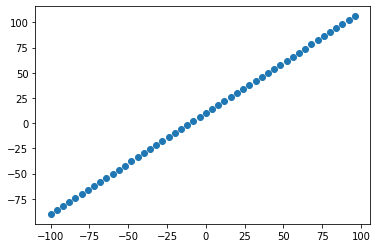

In [72]:
plt.scatter(X,y)

### The 3 sets...
* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model is trained on this data, which is typically 10-15% of the data available. 
* **Test set** - the model gets evaluated on this data to test what has been learned, this set is typically 10-15% of the total data available.

-> sounds like the hold out method

This method of training is called generalization, Why do this? 
`We want our model to perform on data it has't seen before.`